Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

from trendlines import fit_trendlines_single
from trendlines import mapear_retas_com_bottoms
from trendlines import mapear_retas_com_tops
from trendlines import identifica_retas_similares_suporte
from trendlines import identifica_retas_similares_resistencia
from tops_e_bottoms import checa_tops
from tops_e_bottoms import checa_bottoms
from calcula_RSI import compute_rsi

Setando variáveis e carregando dados

In [47]:
# janela_rsi determina o número de períodos em que os parâmetros são calculados
janela_rsi = 42

# ordem determina quantos pontos à direita e à esquerda examinamos para determina pontos de máximo (tops) e mínimos (bottoms) locais
ordem = 6

# lookback determina quantos pontos para trás vamos olhar para desenharmos as primeiras tentativas de retas de suporte e resistência
lookback = 150

# ind_indice determina quais variáveis vamos usar para fazer o estudo:
# 1 = bitcoin
# 2 = ibov
# 3 = S&P 500
# 4 = FTSE All Share
# 5  = DAX
# 6 = Nikkei 225

ind_indice = 2

# datas do intervalo sendo avaliado
start_date = "2018-01-01"
end_date = "2023-12-31"

Carregando dados

In [48]:
indices = {
    1: "BTC-USD",    # Ticker para Bitcoin
    2: "^BVSP",      # Ticker para Ibovespa
    3: "^GSPC",      # Ticker para S&P 500
    4: "^FTSE",      # Ticker para FTSE All Share
    5: "^GDAXI",     # Ticker para DAX
    6: "^N225"       # Ticker para Nikkei 225
}

ticker = indices.get(ind_indice)
if ticker:
    data = yf.download(ticker, start=start_date, end=end_date)
else:
    print("Índice inválido")

print("Dados baixados e salvos com sucesso.")

print(data)

'''

# Carregando os dados
data = pd.read_csv('dados_input/BTCUSDT86400.csv', parse_dates=['date'])
data = data.set_index('date')

print("Dados baixados e salvos com sucesso.")

print(data)

'''
data = data
# Take natural log of data to resolve price scaling issues
data_log = np.log(data)
print(data_log)

[*********************100%%**********************]  1 of 1 completed
Dados baixados e salvos com sucesso.
                     Open           High            Low         Close  \
Date                                                                    
2018-01-02   76403.000000   77909.000000   76403.000000   77891.00000   
2018-01-03   77889.000000   78414.000000   77602.000000   77995.00000   
2018-01-04   77998.000000   79135.000000   77998.000000   78647.00000   
2018-01-05   78644.000000   79071.000000   78218.000000   79071.00000   
2018-01-08   79070.000000   79395.000000   78631.000000   79379.00000   
...                   ...            ...            ...           ...   
2023-12-05  126802.000000  127489.000000  126491.000000  126903.00000   
2023-12-06  126907.000000  127538.000000  125614.000000  125623.00000   
2023-12-07  125623.000000  126581.000000  125566.000000  126010.00000   
2023-12-08  126010.000000  127289.000000  125562.000000  127094.00000   
2023-12-11  127092

C:\Users\fabio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Cálculo do RSI

In [49]:


data['RSI'] = compute_rsi(data_log['Close'],janela_rsi)
rsi_values = compute_rsi(data_log['Close'], janela_rsi)

close_df = pd.DataFrame(data_log['Close'])
close_df.to_csv('log_close.csv', index=True)

close_df = pd.DataFrame(data['Close'])
close_df.to_csv('close.csv', index=True)

rsi_df = pd.DataFrame(data['RSI'])
rsi_df.to_csv('dados_csv_produzidos/rsi_values.csv', index=True)

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2023-12-05    0.002493
2023-12-06    0.002735
2023-12-07    0.002667
2023-12-08    0.002667
2023-12-11    0.002700
Name: Close, Length: 1474, dtype: float64
Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
                ...   
2023-12-05    0.002493
2023-12-06    0.002735
2023-12-07    0.002667
2023-12-08    0.002667
2023-12-11    0.002700
Name: Close, Length: 1474, dtype: float64


Encontrando Topos e Fundos do RSI

In [50]:
tops = []
bottoms = []

for i in range(len(data['RSI'])):
    if checa_tops(data['RSI'], i, ordem):
        # top[0] = confirmation index
        # top[1] = index of top
        # top[2] = price of top
        top = [i, i - ordem, data['RSI'][i - ordem]]
        tops.append(top)
    
    if checa_bottoms(data['RSI'], i, ordem):
        # bottom[0] = confirmation index
        # bottom[1] = index of bottom
        # bottom[2] = price of bottom
        bottom = [i, i - ordem, data['RSI'][i - ordem]]
        bottoms.append(bottom)

tops_df = pd.DataFrame(tops, columns=['conf_idx', 'top_idx', 'top_price'])
tops_df = tops_df.dropna(subset=['top_price'])
tops_df.to_csv('dados_csv_produzidos/topos.csv', index=True)

bottoms_df = pd.DataFrame(bottoms, columns=['conf_idx', 'bottom_idx', 'bottom_price'])
bottoms_df = bottoms_df.dropna(subset=['bottom_price'])
bottoms_df.to_csv('dados_csv_produzidos/bottoms.csv', index=True)



c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\tops_e_bottoms.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = data[k]
c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\tops_e_bottoms.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data[k + i] > v or data[k - i] > v:
C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\230696207.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

Primeiro gráfico meu_grafico_1

C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\3318231511.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=1)
C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\3318231511.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=1)


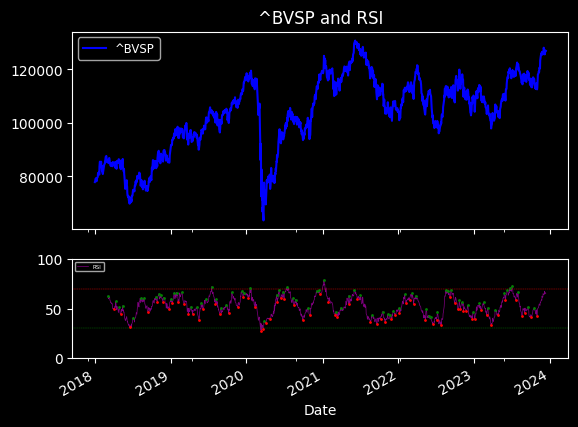

In [51]:
idx = data.index

plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Plotando o preço de fechamento
data['Close'].plot(ax=ax1, color='blue', label=ticker)

# Plotando o RSI
data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# Plotar os topos e fundos no gráfico
for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=1)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=1)


fig.savefig('meu_grafico_0.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

Escolhendo as janelas de observação para a construção das retas de suporte

In [52]:

# Parâmetro
contador_janela = 0
borda_esquerda = bottoms_df['bottom_idx'].iloc[contador_janela]

# Inicializar DataFrames
support_slope = [np.nan] * len(rsi_values)
colunas_suporte = ['indice', 'indice_original_lower_pivot', 'valor_rsi', 'support_slope', 'support_intercept', 'inicio_janela', 'fim_janela']
trendlines_suporte_df = pd.DataFrame(columns=colunas_suporte)

while borda_esquerda + lookback < len(rsi_values):
    # Chamar a função fit_trendlines_single para a janela sendo avaliada
    lower_pivot, support_slope, upper_pivot, resist_slope = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback - 1])
    lower_pivot = lower_pivot + borda_esquerda
    valor_rsi = data['RSI'].iloc[lower_pivot]
    suport_intercept = data['RSI'].iloc[lower_pivot] - lower_pivot * support_slope
    nova_linha_suporte = {
        'indice': contador_janela,
        'indice_original_lower_pivot': lower_pivot,
        'valor_rsi': valor_rsi,
        'support_slope': support_slope,
        'support_intercept':suport_intercept,
        'inicio_janela': borda_esquerda,
        'fim_janela':borda_esquerda + lookback - 1
    }
    trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte, ignore_index=True)

    try:
        proximo_esquerda = bottoms_df.loc[bottoms_df['bottom_idx'].gt(borda_esquerda), 'bottom_idx'].min()
        rolagem_1 = proximo_esquerda - borda_esquerda
    except IndexError:
        proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

    try:
        proximo_direita = bottoms_df.loc[bottoms_df['bottom_idx'].gt(borda_esquerda+lookback), 'bottom_idx'].min()
        rolagem_2 = proximo_direita - (borda_esquerda + lookback)
    except IndexError:
        proximo_direita = None  # Ou qualquer valor padrão que você queira usar

    if proximo_esquerda == None:
        if proximo_direita == None:
            break
        else:
            rolagem = rolagem_2
    else:
        if proximo_direita == None:
            rolagem = rolagem_1
        else:
            rolagem = min(rolagem_1,rolagem_2)
    contador_janela += 1
    borda_esquerda = borda_esquerda + rolagem
    
trendlines_suporte_df.to_csv('dados_csv_produzidos/trendlines_suporte.csv', index=True)


C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\2463464291.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_suporte_df = trendlines_suporte_df._append(nova_linha_suporte, ignore_index=True)


Criando as linhas de resistência

In [53]:
contador_janela = 0
borda_esquerda = tops_df['top_idx'].iloc[contador_janela]

# Inicializar DataFrames

resist_slope = [np.nan] * len(rsi_values)
colunas_resistencia = ['indice', 'indice_original_upper_pivot','valor_rsi', 'resist_slope', 'resist_intercept', 'inicio_janela', 'fim_janela']
trendlines_resistencia_df = pd.DataFrame(columns=colunas_resistencia)

while borda_esquerda + lookback < len(rsi_values):
    # Chamar a função fit_trendlines_single para a janela sendo avaliada
    lower_pivot, support_slope, upper_pivot, resist_slope = fit_trendlines_single(rsi_values[borda_esquerda:borda_esquerda+lookback - 1])
    upper_pivot = upper_pivot + borda_esquerda
    valor_rsi = data['RSI'].iloc[upper_pivot]
    resist_intercept = data['RSI'].iloc[upper_pivot] - upper_pivot * resist_slope
    nova_linha_resistencia = {
        'indice': contador_janela,
        'indice_original_upper_pivot': upper_pivot,
        'valor_rsi': valor_rsi,
        'resist_slope': resist_slope,
        'resist_intercept':resist_intercept,
        'inicio_janela': borda_esquerda,
        'fim_janela':borda_esquerda + lookback - 1
    }
    trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia, ignore_index=True)

    try:
        proximo_esquerda = tops_df.loc[tops_df['top_idx'].gt(borda_esquerda), 'top_idx'].min()
        rolagem_1 = proximo_esquerda - borda_esquerda
    except IndexError:
        proximo_esquerda = None  # Ou qualquer valor padrão que você queira usar

    try:
        proximo_direita = tops_df.loc[tops_df['top_idx'].gt(borda_esquerda+lookback), 'top_idx'].min()
        rolagem_2 = proximo_direita - (borda_esquerda + lookback)
    except IndexError:
        proximo_direita = None  # Ou qualquer valor padrão que você queira usar

    if proximo_esquerda == None:
        if proximo_direita == None:
            break
        else:
            rolagem = rolagem_2
    else:
        if proximo_direita == None:
            rolagem = rolagem_1
        else:
            rolagem = min(rolagem_1,rolagem_2)
    contador_janela += 1
    borda_esquerda = borda_esquerda + rolagem
    
trendlines_resistencia_df.to_csv('dados_csv_produzidos/trendlines_resistencia.csv', index=True)

C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\4049671785.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trendlines_resistencia_df = trendlines_resistencia_df._append(nova_linha_resistencia, ignore_index=True)


In [54]:
slope_ok_trendlines_suporte_df = trendlines_suporte_df.loc[trendlines_suporte_df['support_slope'] > 0]
slope_ok_trendlines_suporte_df = slope_ok_trendlines_suporte_df.reset_index(drop=True)
slope_ok_trendlines_suporte_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_suporte.csv', index=True)

slope_ok_trendlines_resistencia_df = trendlines_resistencia_df.loc[trendlines_resistencia_df['resist_slope'] < 0]
slope_ok_trendlines_resistencia_df = slope_ok_trendlines_resistencia_df.reset_index(drop=True)
slope_ok_trendlines_resistencia_df.to_csv('dados_csv_produzidos/slope_ok_trendlines_resistencia.csv', index=True)

Plotando meu_grafico_1 com o primeiro ajuste

C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\2741983846.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\2741983846.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


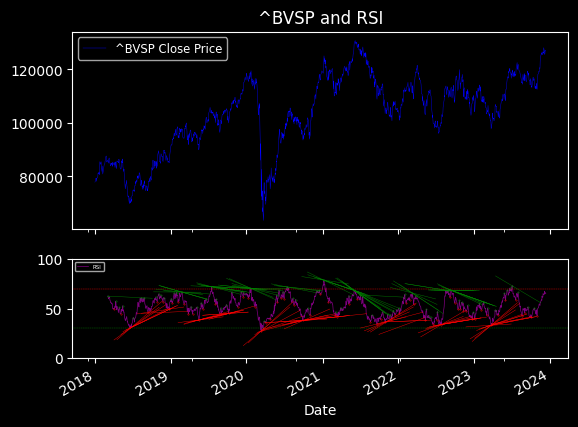

In [55]:
plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(slope_ok_trendlines_suporte_df)):
    row = slope_ok_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.3)

# ----------------------------------------------------------------


# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de resistencia do RSI
# ----------------------------------------------------------------   

for i in range(len(slope_ok_trendlines_resistencia_df)):
    row = slope_ok_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = int(row['fim_janela'])
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.3)

# ----------------------------------------------------------------

fig.savefig('meu_grafico_1.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------



Mapeando as retas suporte para encontrar as que passaram por três bottoms até o fim da janela que criou a reta

In [56]:
mapeados_trendlines_suporte_df = mapear_retas_com_bottoms(bottoms_df, slope_ok_trendlines_suporte_df, 2)

mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

In [57]:
# Preparando o DataFrame para os resultados consolidados


mapeados_trendlines_suporte_df.to_csv('dados_csv_produzidos/mapeados_trendlines_suporte.csv', index=True)

expurgado_trendlines_suporte_df = mapeados_trendlines_suporte_df[mapeados_trendlines_suporte_df['mapeado'] != 0]

expurgado_trendlines_suporte_df.to_csv('dados_csv_produzidos/expurgado_trendlines_suporte.csv', index=True)

# Preparando o DataFrame para os resultados consolidados
mapeados_trendlines_resistencia_df = mapear_retas_com_tops(tops_df, slope_ok_trendlines_resistencia_df, 2)

mapeados_trendlines_resistencia_df.to_csv('dados_csv_produzidos/mapeados_trendlines_resistencia.csv', index=True)

expurgado_trendlines_resistencia_df = mapeados_trendlines_resistencia_df[mapeados_trendlines_resistencia_df['mapeado'] != 0]

expurgado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/expurgado_trendlines_resistencia.csv', index=True)

C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\3831244281.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\3831244281.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


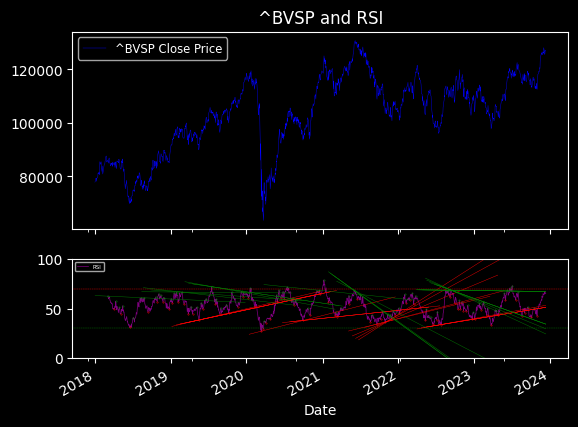

In [58]:
plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)
    
# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(expurgado_trendlines_suporte_df)):
    row = expurgado_trendlines_suporte_df.iloc[i]

    x_start = int(row['inicio_janela'])-40
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, 300+int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.3)

# ----------------------------------------------------------------

for i in range(len(expurgado_trendlines_resistencia_df)):
    row = expurgado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['inicio_janela'])-40
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, 300+int(row['fim_janela']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, 200+int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.3)

# ----------------------------------------------------------------

fig.savefig('meu_grafico_2.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------

In [59]:
eliminado_trendlines_suporte_df = identifica_retas_similares_suporte(expurgado_trendlines_suporte_df)
eliminado_trendlines_suporte_df.to_csv('dados_csv_produzidos/eliminado_trendlines_suporte.csv', index=True)

eliminado_trendlines_resistencia_df = identifica_retas_similares_resistencia(expurgado_trendlines_resistencia_df)
eliminado_trendlines_resistencia_df.to_csv('dados_csv_produzidos/eliminado_trendlines_resistencia.csv', index=True)

c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\trendlines.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reta_similar'] = np.nan
c:\Users\fabio\Dropbox\FGV\Curso Estratégias de Trading\Lista 2 PC\Lista-2\trendlines.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reta_similar'] = np.nan


C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\4068896349.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)
C:\Users\fabio\AppData\Local\Temp\ipykernel_22284\4068896349.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)


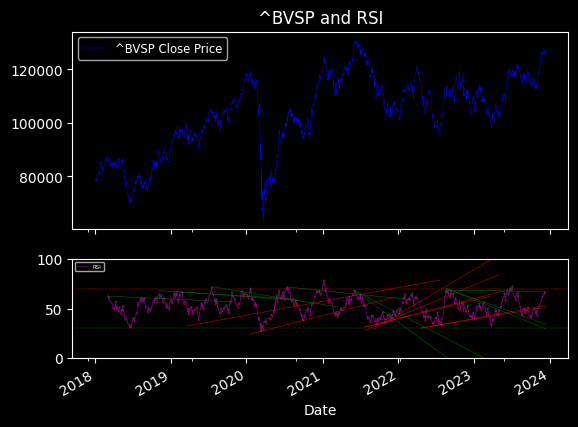

In [60]:

plt.style.use('dark_background')
fig, (ax1, ax3) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# ----------------------------------------------------------------   
# Plotando o preço de fechamento
# ----------------------------------------------------------------   

data['Close'].plot(ax=ax1, color='blue', label=ticker + ' Close Price', linewidth = 0.3)

# ----------------------------------------------------------------   
# Plotando o RSI
# ----------------------------------------------------------------   

data['RSI'].plot(ax=ax3, color='purple', label='RSI', linewidth = 0.5)
ax3.axhline(70, color='red', linestyle='--', linewidth = 0.3)  # Linha de sobrecompra
ax3.axhline(30, color='green', linestyle='--', linewidth = 0.3)  # Linha de sobrevenda

plt.legend()
ax1.set_title(ticker + " and RSI")
ax1.legend(loc='upper left', fontsize='small')
ax3.legend(loc='upper left', fontsize=4)
ax3.set_ylim([0, 100])  # O RSI varia de 0 a 100

# ----------------------------------------------------------------   
# Plotar os topos e fundos no gráfico
# ----------------------------------------------------------------   

for top in tops_df.itertuples():
    # Plotar cada topo no gráfico RSI usando a data correspondente
    ax3.plot(idx[top.top_idx], data['RSI'][top.top_idx], marker='o', color='green', markersize=0.3)

for bottom in bottoms_df.itertuples():
    # Plotar cada fundo no gráfico RSI usando a data correspondente
    ax3.plot(idx[bottom.bottom_idx], data['RSI'][bottom.bottom_idx], marker='o', color='red', markersize=0.3)
    
# Obter as datas associadas aos valores do RSI
datas = data.index[len(data.index) - len(rsi_values):]

# ----------------------------------------------------------------   
# Plotar as retas de suporte do RSI
# ----------------------------------------------------------------   

for i in range(len(eliminado_trendlines_suporte_df)):
    row = eliminado_trendlines_suporte_df.iloc[i]

    x_start = int(row['x_min'])-40
    y_start = row['support_slope'] * x_start + row['support_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_start = row['support_slope'] * x_start + row['support_intercept']

    x_end = min(len(datas)-1, 300+int(row['x_max']))
    y_end = row['support_slope'] * x_end + row['support_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['support_intercept'] / row['support_slope'])))
        y_end = row['support_slope'] * x_end + row['support_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='r', linewidth=0.3)

# ----------------------------------------------------------------

for i in range(len(eliminado_trendlines_resistencia_df)):
    row = eliminado_trendlines_resistencia_df.iloc[i]

    x_start = int(row['x_min'])
    y_start = row['resist_slope'] * x_start + row['resist_intercept']

    # Ajustar y_start se necessário
    if y_start < 0:
        x_start = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_start = row['resist_slope'] * x_start + row['resist_intercept']

    x_end = min(len(datas)-1, 300+int(row['x_max']))
    y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Ajustar y_end se necessário
    if y_end < 0:
        x_end = max(0, min(len(datas) - 1, int(-row['resist_intercept'] / row['resist_slope'])))
        y_end = row['resist_slope'] * x_end + row['resist_intercept']

    # Obter datas de início e fim
    data_start = datas[x_start]
    data_end = datas[x_end]

    # Desenhar o segmento de reta
    ax3.plot([data_start, data_end], [y_start, y_end], color='green', linewidth=0.3)

# ----------------------------------------------------------------
fig.savefig('meu_grafico_3.png', dpi=300)  # Salva a figura como um arquivo PNG com alta resolução

plt.show()

# ----------------------------------------------------------------
